# Imports

In [1]:

# coding: utf-8

# # Imports

# ## Qutip imports 1

# In[1]:


from qutip.operators import sigmax, sigmay, sigmaz, identity
# position, momentum, num, create, destroy, commutator, qeye 
from qutip.tensor import tensor
from qutip.qip.gates import swap, rx, ry, rz
from qutip.qobj import Qobj
from qutip.visualization import hinton
from qutip.visualization import matrix_histogram_complex, matrix_histogram
from qutip.random_objects import rand_herm, rand_unitary, rand_dm


# ## Qutip imports 2

# In[2]:


#from 


# ## Numpy imports 

# In[2]:


from numpy import sin, cos, tan, real, imag,  log, conj
from numpy import array, append, linspace, arange
from numpy import add, sqrt, abs, dot
from numpy.random import random, random_sample, rand, seed, RandomState
from numpy import concatenate, trace, diag
from numpy import ones, zeros, ones_like, zeros_like
from numpy import amax, amin, nanmax, nanmin
from numpy import outer, multiply
# from numpy import pi


# ## Scipy imports

# In[17]:


from scipy.integrate import ode, odeint, complex_ode
from scipy.optimize import minimize
from scipy.linalg import eigh, inv, norm, expm
# from scipy.linalg import 
# from scipy import


# ## Matplotlib imports

# In[18]:


from matplotlib.pyplot import plot, figure, show, savefig, axes
from matplotlib.pyplot import xlabel, ylabel, title, legend
from matplotlib import rcParams
from matplotlib.pyplot import style 
from matplotlib.pyplot import xlim, ylim, axis 
# beware not same as axes
from matplotlib.pyplot import subplot, subplots, text
from matplotlib.pyplot import GridSpec
from matplotlib.pyplot import scatter, colorbar


pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
rcParams.update(pgf_with_rc_fonts)
style.use('seaborn-whitegrid')


# ## Math imports

# In[19]:


from math import pi
from math import exp


# ## Cmath imports

# ## Date and datetime imports

# In[20]:


from datetime import date
from datetime import datetime# now


# ## Os imports

# In[21]:


from os import getcwd, mkdir, chdir
from os.path import abspath, join 


# ## Sympy imports

# In[22]:


from sympy import Function, dsolve, Eq, Derivative, symbols
# x, y, z, t = symbols('x y z t')
# k, m, n = symbols('k m n', integer=True)
# f, g, h = symbols('f g h', cls=Function)


# ## Miscellaneous imports

# ## Extra useful functions

# In[23]:


def rint(x):
    print("x = ", x)
    return None


# # Next chapter

# ## sub topic 1

# ## sub topic 2

# ## sub topic 3

# ### sub sub topic 1



# The code 

## memory wiping

In [190]:
%reset_selective -f  omega_1, total_time, epsilon, max_iter, time_steps, dt

In [191]:
%reset_selective -f  Lin, T_s, I

## Building parts

### Building the things to be calculated only once

In [192]:
def maker(H_0, H_1, T_s, Lin, d=2, gamma=0.1):
    r"""maker
    Makes all the things that remain constant throught the program, but are 
    repeatedly used.
    

    Parameters
    ----------
              
    H_0     : Qobj
              Bare Hamiltonian 
              
    H_1     : Qobj
              Interaction Hamiltonian 
              
    T_s     : Qobj
              Unitary to be implemented in the Hilbert space
    
    Lin     : Qobj
              Linbladian operators

    d       : int
              Dimension of the matrix. Defaults to 2
    
    gamma   : float
              Damping constant of the Linbladian

    
    Returns
    -------
    
    ih0     : Qobj
              $I\otimes H_{0}$
              
    ih1     : Qobj
              $I\otimes H_{1}$

    h0ci    : Qobj
              $H_{0}^{*}\otimes I $

    h1ci    : Qobj
              $H_{1}^{*}\otimes I $

    T       : Qobj
              Target unitary transformed to the Liouville space

    linbladian : Qobj
                 The full lindbladian term as it appears on transformation to 
                 the Liouville space.
        
    """
    I = identity(d)
    L_I = tensor(I, I)
    ih0 = tensor(I, H_0) 
    ih1 = tensor(I, H_1) 
    h0ci = tensor(H_0.conj(), I) 
    h1ci = tensor(H_1.conj(), I)
    x_k = ih1 - h1ci
    term1 = tensor(Lin.trans(), Lin)
    term2 = tensor(I, ((Lin.dag())*(Lin)))
    term3 = tensor(((Lin.trans())*(Lin.conj())), I)
    lindbladian = 1j*(gamma)*(term1 - 0.5*(term2 + term3))
    T = tensor(T_s.trans(), T_s) # Transforming $T_{s}$ to liouville space
    
    
    return ih0, ih1, h0ci, h1ci, x_k, lindbladian, T, L_I

In [193]:
omega_1 = 0.5
H_0 = omega_1*sigmaz() 
H_1 = sigmay()
T_s = sigmax() 
Lin = sigmaz()
ih0, ih1, h0ci, h1ci, x_k, lindbladian, T, L_I  = maker(
                                                  H_0, H_1, T_s, 
                                                  Lin, d=2, gamma=0.1)

In [194]:
L_I

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

### Building $And(t)$

In [195]:
def And(xi):
    r"""making $And(t)$"""
    And = ih0 - h0ci + xi*(ih1 - h1ci) + lindbladian
    return And

In [196]:
And(0.5)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.+0.j   0.-0.5j  0.-0.5j  0.+0.j ]
 [ 0.+0.5j -1.-0.2j  0.+0.j   0.-0.5j]
 [ 0.+0.5j  0.+0.j   1.-0.2j  0.-0.5j]
 [ 0.+0.j   0.+0.5j  0.+0.5j  0.+0.j ]]

### Building $Lnd(t)$ 

In [197]:
def Lnd(xi, dt):
    r"""Making $Lnd(t) from $A(t)$"""
    Lnd = (-1j*And(xi)*dt).expm()
    return Lnd

In [198]:
Lnd(0.5, 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99999750e-01+0.00000000e+00j -4.99949837e-04-2.49966628e-07j
  -4.99949837e-04+2.49966628e-07j  2.49983293e-07+0.00000000e+00j]
 [ 4.99949837e-04+2.49966628e-07j  9.99799270e-01+9.99799687e-04j
  -2.49966628e-07+0.00000000e+00j -4.99949837e-04-2.49966628e-07j]
 [ 4.99949837e-04-2.49966628e-07j -2.49966628e-07+0.00000000e+00j
   9.99799270e-01-9.99799687e-04j -4.99949837e-04+2.49966628e-07j]
 [ 2.49983293e-07+0.00000000e+00j  4.99949837e-04+2.49966628e-07j
   4.99949837e-04-2.49966628e-07j  9.99999750e-01+0.00000000e+00j]]

## Major functions

### Major functions 1

In [199]:
# building the function to optimize (optimizee)
def Lnd_vec(xi_vec, dt):
    r"""Building the vector of differential $Lnd(t)$"""
    Lnd_vec = [Lnd(xi, dt) for xi in xi_vec] 
    return Lnd_vec

In [200]:
def fidelity_calc(A, B):
    r"""Making a generalised fidelity function"""
    first_part = (A - B).dag()
    second_part = (A - B)
    f_int = (first_part* second_part)
    f = f_int.tr()
    return f

In [201]:
def Lnd_full_maker(xi_vec, dt):
    r"""Building the $Lnd(t)$ for the total time $t$"""
    xi_vec_size = xi_vec.size # finding the size of xi
    Lnd_full = L_I # Identity for the for loop of Lnd
    Lnd_v = Lnd_vec(xi_vec, dt) # calling Lnd_vec
    for i in range(xi_vec_size): # generating Lnd_full
        Lnd_full = Lnd_full*Lnd_v[xi_vec_size - 1 - i]
    return Lnd_full

In [202]:
def F(xi_vec, dt):
    r"""Using the fidelity metric to find out the closeness between $T$
    and $Lnd(t)$"""
    Lnd_full = Lnd_full_maker(xi_vec, dt)
    F = real(-fidelity_calc(T, Lnd_full))   
    return F

### Testing major functions 1

In [203]:
fidelity_calc(sigmax(), sigmay())

4.0

In [204]:
fidelity_calc(sigmay(), sigmay())

0.0

In [205]:
xi_vec_test = array([1.0, 2.0])
xi_vec_test

array([1., 2.])

In [206]:
xi_vec_test.size

2

In [207]:
w_vec = [xi**2 for xi in xi_vec_test]
w_vec

[1.0, 4.0]

In [208]:
# F(xi_vec, dt)
F(xi_vec_test, 0.001)

-7.998400634493139

In [209]:
Lnd_v = Lnd_vec(xi_vec_test, 0.001)

In [210]:
Lnd_v

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
 Qobj data =
 [[ 9.99999000e-01+0.00000000e+00j -9.99899173e-04-4.99933130e-07j
   -9.99899173e-04+4.99933130e-07j  9.99932920e-07+0.00000000e+00j]
  [ 9.99899173e-04+4.99933130e-07j  9.99798520e-01+9.99799187e-04j
   -9.99866260e-07+0.00000000e+00j -9.99899173e-04-4.99933130e-07j]
  [ 9.99899173e-04-4.99933130e-07j -9.99866260e-07+0.00000000e+00j
    9.99798520e-01-9.99799187e-04j -9.99899173e-04+4.99933130e-07j]
  [ 9.99932920e-07+0.00000000e+00j  9.99899173e-04+4.99933130e-07j
    9.99899173e-04-4.99933130e-07j  9.99999000e-01+0.00000000e+00j]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
 Qobj data =
 [[ 9.99996000e-01+0.00000000e+00j -1.99979435e-03-9.99865260e-07j
   -1.99979435e-03+9.99865260e-07j  3.99972768e-06+0.00000000e+00j]
  [ 1.99979435e-03+9.99865260e-07j  9.99795521e-01+9.99797187e-04j
   -3.99946104e-06+0.00000000e+00j -1.99979435e-03-9.99865

### Major Functions 2

In [211]:
def Lnd_comma_k_maker(xi_vec, k, dt):
    r"""Making of the derivative of full $Lnd(t)$ at time $t_{k}$"""
    N = xi_vec.size 
    # Determining the size of xi, and thus the time_steps indirectly.
    Lnd_v = Lnd_vec(xi_vec, dt)# Making of the full $Lnd(t)$
    inner_part = L_I # Beginner for the for loop
    for i in range(N):
        if i == ( N - 1 - k ):
            # The step at which $X_{k}(t)$ has to be inserted 
            inner_part = inner_part*x_k*Lnd_v[k - 1]
        else:
            # Usual multiplications of $Lnd_{k}$
            inner_part = inner_part*Lnd_v[N - 1 - i]
    lnd_comma_k = inner_part
    return lnd_comma_k
    

In [212]:
# Lnd_comma_k_maker(xi_vec, k, dt)
Lnd_comma_k_maker(xi_vec_test, 2, 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99991001e-01+0.00000000e+00j -2.99927960e-03-3.49898670e-06j
  -2.99927960e-03+3.49898670e-06j  8.99883703e-06+0.00000000e+00j]
 [ 2.99948056e-03+2.49939255e-06j  9.99589083e-01+1.99918650e-03j
  -8.99750347e-06+2.99899242e-09j -2.99948056e-03-2.49939255e-06j]
 [ 2.99948056e-03-2.49939255e-06j -8.99750347e-06-2.99899242e-09j
   9.99589083e-01-1.99918650e-03j -2.99948056e-03+2.49939255e-06j]
 [ 8.99883703e-06+0.00000000e+00j  2.99927960e-03+3.49898670e-06j
   2.99927960e-03-3.49898670e-06j  9.99991001e-01+0.00000000e+00j]]

In [213]:
def updater_nd(xi_vec, dt, epsilon):
    r"""Implementing the GRAPE update step"""
    xi_vec_size = xi_vec.size # finding the size of xi
    Lnd_full = Lnd_full_maker(xi_vec, dt)
    di = []
    for k in range(xi_vec_size):
        # Building the thing to be added to the old function
        Lnd_comma_k = Lnd_comma_k_maker(xi_vec, k, dt)
        differentiated = T - Lnd_comma_k
        plain = T - Lnd_full
        c = -differentiated.dag()*plain
        d = -plain.dag()*differentiated
        inside = c.tr() + d.tr()
        di.append(epsilon*inside)

    diff = array(di)
    xi_new_vec = xi_vec + diff
    return diff, xi_new_vec
    

In [214]:
#  updater_nd(xi_vec, dt, epsilon)
updater_nd(xi_vec_test, 0.001, 0.001)

(array([-0.008+0.j, -0.008+0.j]), array([0.992+0.j, 1.992+0.j]))

In [215]:
def terminator_nd(max_iter, time_steps, total_time, epsilon):
    r"""Brief description of the function"""
    
    xi_initial =  1000*random_sample((time_steps,))
    dt = total_time/time_steps
    xi_diff, xi_new_vec = updater_nd(xi_initial, dt, epsilon)
    
    for i in range(max_iter):
        if amax(xi_diff) < epsilon**2 :
            xi_final = xi_new_vec
            break
        else :
            xi_diff, xi_new_vec = updater_nd(xi_new_vec, dt, epsilon)
            print(i)
            print(amax(xi_diff))
            
        
    xi_final = xi_new_vec    
    return xi_final

# code with dissipation

## Building parts

### Building $A(t)$

In [216]:
def A(xi):
    r"""making $A(t)$"""
    A = ih0 - h0ci + xi*(ih1 - h1ci) + lindbladian
    return A

In [217]:
A(0.5)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.+0.j   0.-0.5j  0.-0.5j  0.+0.j ]
 [ 0.+0.5j -1.-0.2j  0.+0.j   0.-0.5j]
 [ 0.+0.5j  0.+0.j   1.-0.2j  0.-0.5j]
 [ 0.+0.j   0.+0.5j  0.+0.5j  0.+0.j ]]

### Building $L(t)$ and the Identity in the Liouville space

In [218]:
def L(xi, dt):
    r"""Making $L(t) from $A(t)$"""
    L = (-1j*A(xi)*dt).expm()
    return L

In [219]:
L(0.5, 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99999750e-01+0.00000000e+00j -4.99949837e-04-2.49966628e-07j
  -4.99949837e-04+2.49966628e-07j  2.49983293e-07+0.00000000e+00j]
 [ 4.99949837e-04+2.49966628e-07j  9.99799270e-01+9.99799687e-04j
  -2.49966628e-07+0.00000000e+00j -4.99949837e-04-2.49966628e-07j]
 [ 4.99949837e-04-2.49966628e-07j -2.49966628e-07+0.00000000e+00j
   9.99799270e-01-9.99799687e-04j -4.99949837e-04+2.49966628e-07j]
 [ 2.49983293e-07+0.00000000e+00j  4.99949837e-04+2.49966628e-07j
   4.99949837e-04-2.49966628e-07j  9.99999750e-01+0.00000000e+00j]]

## Major functions

### Major functions 1

In [220]:
# building the function to optimize (optimizee)
def L_vec(xi_vec, dt):
    r"""Building the vector of differential $L(t)$"""
    L_vec = [L(xi, dt) for xi in xi_vec] 
    return L_vec

In [221]:
def fidelity_calc(A, B):
    r"""Making a generalised fidelity function"""
    first_part = (A - B).dag()
    second_part = (A - B)
    f_int = (first_part* second_part)
    f = f_int.tr()
    return f

In [222]:
def L_full_maker(xi_vec, dt):
    r"""Building the $L(t)$ for the total time $t$"""
    xi_vec_size = xi_vec.size # finding the size of xi
    L_full = L_I # Identity for the for loop of L
    L_v = L_vec(xi_vec, dt) # calling L_vec
    for i in range(xi_vec_size): # generating L_full
        L_full = L_full*L_v[xi_vec_size - 1 - i]
    return L_full

In [223]:
def F(xi_vec, dt):
    r"""Using the fidelity metric to find out the closeness between $T$
    and $L(t)$"""
    L_full = L_full_maker(xi_vec, dt)
    F = real(-fidelity_calc(T, L_full))   
    return F

### Testing major functions 1

In [224]:
fidelity_calc(sigmax(), sigmay())

4.0

In [225]:
fidelity_calc(sigmay(), sigmay())

0.0

In [226]:
xi_vec_test = array([1.0, 2.0])
xi_vec_test

array([1., 2.])

In [227]:
xi_vec_test.size

2

In [228]:
w_vec = [xi**2 for xi in xi_vec_test]
w_vec

[1.0, 4.0]

In [229]:
# F(xi_vec, dt)
F(xi_vec_test, 0.001)

-7.998400634493139

In [230]:
L_v = L_vec(xi_vec_test, 0.001)

In [231]:
L_v

[Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
 Qobj data =
 [[ 9.99999000e-01+0.00000000e+00j -9.99899173e-04-4.99933130e-07j
   -9.99899173e-04+4.99933130e-07j  9.99932920e-07+0.00000000e+00j]
  [ 9.99899173e-04+4.99933130e-07j  9.99798520e-01+9.99799187e-04j
   -9.99866260e-07+0.00000000e+00j -9.99899173e-04-4.99933130e-07j]
  [ 9.99899173e-04-4.99933130e-07j -9.99866260e-07+0.00000000e+00j
    9.99798520e-01-9.99799187e-04j -9.99899173e-04+4.99933130e-07j]
  [ 9.99932920e-07+0.00000000e+00j  9.99899173e-04+4.99933130e-07j
    9.99899173e-04-4.99933130e-07j  9.99999000e-01+0.00000000e+00j]],
 Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
 Qobj data =
 [[ 9.99996000e-01+0.00000000e+00j -1.99979435e-03-9.99865260e-07j
   -1.99979435e-03+9.99865260e-07j  3.99972768e-06+0.00000000e+00j]
  [ 1.99979435e-03+9.99865260e-07j  9.99795521e-01+9.99797187e-04j
   -3.99946104e-06+0.00000000e+00j -1.99979435e-03-9.99865

### Major Functions 2

In [232]:
def L_comma_k_maker(xi_vec, k, dt):
    r"""Making of the derivative of full $L(t)$ at time $t_{k}$"""
    N = xi_vec.size 
    # Determining the size of xi, and thus the time_steps indirectly.
    L_v = L_vec(xi_vec, dt)# Making of the full $L(t)$
    inner_part = L_I # Beginner for the for loop
    for i in range(N):
        if i == ( N - 1 - k ):
            # The step at which $X_{k}(t)$ has to be inserted 
            inner_part = inner_part*x_k*L_v[k - 1]
        else:
            # Usual multiplications of $L_{k}$
            inner_part = inner_part*L_v[N - 1 - i]
    l_comma_k = inner_part
    return l_comma_k
    

In [233]:
# L_comma_k_maker(xi_vec, k, dt)
L_comma_k_maker(xi_vec_test, 2, 0.001)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 9.99991001e-01+0.00000000e+00j -2.99927960e-03-3.49898670e-06j
  -2.99927960e-03+3.49898670e-06j  8.99883703e-06+0.00000000e+00j]
 [ 2.99948056e-03+2.49939255e-06j  9.99589083e-01+1.99918650e-03j
  -8.99750347e-06+2.99899242e-09j -2.99948056e-03-2.49939255e-06j]
 [ 2.99948056e-03-2.49939255e-06j -8.99750347e-06-2.99899242e-09j
   9.99589083e-01-1.99918650e-03j -2.99948056e-03+2.49939255e-06j]
 [ 8.99883703e-06+0.00000000e+00j  2.99927960e-03+3.49898670e-06j
   2.99927960e-03-3.49898670e-06j  9.99991001e-01+0.00000000e+00j]]

In [234]:
def updater(xi_vec, dt, epsilon):
    r"""Implementing the GRAPE update step"""
    xi_vec_size = xi_vec.size # finding the size of xi
    L_full = L_full_maker(xi_vec, dt)
    di = []
    for k in range(xi_vec_size):
        # Building the thing to be added to the old function
        L_comma_k = L_comma_k_maker(xi_vec, k, dt)
        differentiated = T - L_comma_k
        plain = T - L_full
        c = -differentiated.dag()*plain
        d = -plain.dag()*differentiated
        inside = c.tr() + d.tr()
        di.append(epsilon*inside)

    diff = array(di)
    xi_new_vec = xi_vec + diff
    return diff, xi_new_vec
    

In [235]:
#  updater(xi_vec, dt, epsilon)
updater(xi_vec_test, 0.001, 0.001)

(array([-0.008+0.j, -0.008+0.j]), array([0.992+0.j, 1.992+0.j]))

In [236]:
def terminator(max_iter, time_steps, total_time, epsilon):
    r"""Brief description of the function"""
    
    xi_initial = terminator_nd(max_iter, time_steps, total_time, epsilon)
    #1000*random_sample((time_steps,))
    dt = total_time/time_steps
    xi_diff, xi_new_vec = updater(xi_initial, dt, epsilon)
    
    for i in range(max_iter):
        if amax(xi_diff) < epsilon**2 :
            xi_final = xi_new_vec
            break
        else :
            xi_diff, xi_new_vec = updater(xi_new_vec, dt, epsilon)
            print(i)
            print(amax(xi_diff))
            
        
    xi_final = xi_new_vec    
    return xi_final

# Running stuff

### Try1

In [94]:
total_time = pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [95]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([915.461213  +0.j, 333.39938497+0.j, 946.91467385+0.j,
       534.74637012+0.j, 739.12916711+0.j, 609.48934992+0.j,
       775.42440905+0.j,  93.58049087+0.j, 875.88568367+0.j,
       478.7054844 +0.j, 232.80885004+0.j, 780.63068781+0.j,
       513.9440398 +0.j, 398.77629301+0.j,  64.00940646+0.j,
       669.37794698+0.j, 843.30811406+0.j, 533.44141718+0.j,
       864.99274356+0.j,  10.74761358+0.j])

In [96]:
F(xi_opt, dt)

-4.215756802573784

In [97]:
max_iter

10

In [98]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [99]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.23514455+0.j         -0.03505325-0.00013952j -0.03505325+0.00013952j
   0.76485545+0.j        ]
 [ 0.03476011+0.00267567j -0.12163332-0.00135393j -0.40625823-0.00674039j
  -0.03476011-0.00267567j]
 [ 0.03476011-0.00267567j -0.40625823+0.00674039j -0.12163332+0.00135393j
  -0.03476011+0.00267567j]
 [ 0.76485545+0.j          0.03505325+0.00013952j  0.03505325-0.00013952j
   0.23514455+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a09256160>)

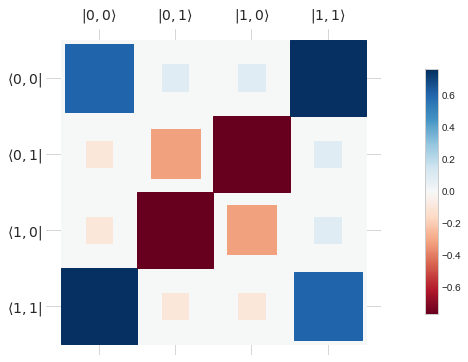

In [100]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [101]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [102]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([530.01041187+0.j,  20.62390784+0.j, 616.55264548+0.j,
         6.32523092+0.j,  42.00182345+0.j, 371.60579057+0.j,
       337.9237754 +0.j, 523.79065521+0.j, 784.82821972+0.j,
       876.30199234+0.j, 844.24572897+0.j, 653.65387553+0.j,
       923.44867479+0.j, 852.52287919+0.j, 482.00843933+0.j,
       617.53446452+0.j, 473.17506862+0.j, 283.44836898+0.j,
       617.84485144+0.j, 614.12268227+0.j])

In [103]:
F(xi_opt, dt)

-3.0933186948722575

In [104]:
max_iter

10

In [105]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [106]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.43892742+0.00000000e+00j  0.04473447-1.46295746e-03j
   0.04473447+1.46295746e-03j  0.56107258+0.00000000e+00j]
 [-0.0449654 -3.01224064e-05j -0.04967847+3.34953222e-04j
  -0.07276489-1.34565488e-03j  0.0449654 +3.01224064e-05j]
 [-0.0449654 +3.01224064e-05j -0.07276489+1.34565488e-03j
  -0.04967847-3.34953222e-04j  0.0449654 -3.01224064e-05j]
 [ 0.56107258+0.00000000e+00j -0.04473447+1.46295746e-03j
  -0.04473447-1.46295746e-03j  0.43892742+0.00000000e+00j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a14c58748>)

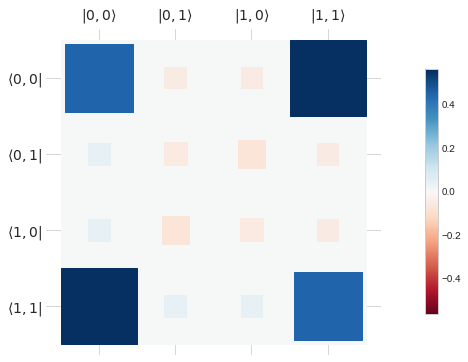

In [107]:
hinton(L_full_maker(xi_opt, dt))

### Try

In [108]:
total_time = 4*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [109]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([968.97591323+0.j,  94.92837101+0.j, 521.46126655+0.j,
        45.75183013+0.j, 138.02305706+0.j, 437.93618785+0.j,
       791.48894127+0.j, 236.41072883+0.j, 824.43024474+0.j,
       453.83221213+0.j, 826.79682197+0.j, 247.15575793+0.j,
       379.65721926+0.j, 309.01377641+0.j, 681.21213128+0.j,
       163.37538142+0.j, 520.06465437+0.j, 186.8295315 +0.j,
       165.59722338+0.j, 420.11068375+0.j])

In [110]:
F(xi_opt, dt)

-3.0261573339510384

In [111]:
max_iter

10

In [112]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [113]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.50628448+0.00000000e+00j -0.04002306+2.00898952e-04j
  -0.04002306-2.00898952e-04j  0.49371552+0.00000000e+00j]
 [ 0.03998605+6.62433862e-05j  0.00959864+4.41380451e-04j
   0.0030362 -1.79752650e-04j -0.03998605-6.62433862e-05j]
 [ 0.03998605-6.62433862e-05j  0.0030362 +1.79752650e-04j
   0.00959864-4.41380451e-04j -0.03998605+6.62433862e-05j]
 [ 0.49371552+0.00000000e+00j  0.04002306-2.00898952e-04j
   0.04002306+2.00898952e-04j  0.50628448+0.00000000e+00j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a15a3fc88>)

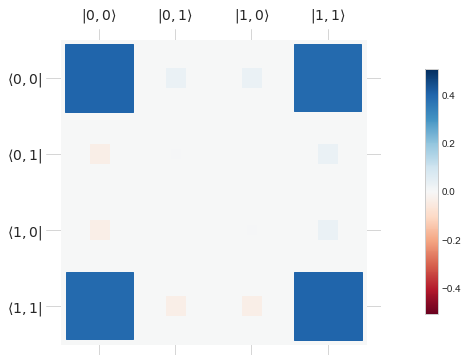

In [114]:
hinton(L_full_maker(xi_opt, dt))

### Try

In [115]:
total_time = 5*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [116]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([978.35820169+0.j, 850.67545751+0.j, 536.47320775+0.j,
       261.68310673+0.j, 320.92002581+0.j, 691.66880984+0.j,
       125.64763055+0.j, 438.06547091+0.j, 710.14525712+0.j,
       605.04616323+0.j, 503.61018134+0.j, 748.31288534+0.j,
       465.81980666+0.j, 443.59917251+0.j, 155.05088573+0.j,
       415.67043764+0.j, 547.44003387+0.j, 192.05074225+0.j,
       627.57138898+0.j, 408.56410393+0.j])

In [117]:
F(xi_opt, dt)

-3.0075305113948465

In [118]:
max_iter

10

In [119]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [120]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.50798772+0.00000000e+00j -0.0200727 +6.20061297e-06j
  -0.0200727 -6.20061297e-06j  0.49201228+0.00000000e+00j]
 [ 0.02008479+3.90950575e-05j  0.00890701+6.38911691e-05j
   0.00703966-9.41403824e-06j -0.02008479-3.90950575e-05j]
 [ 0.02008479-3.90950575e-05j  0.00703966+9.41403824e-06j
   0.00890701-6.38911691e-05j -0.02008479+3.90950575e-05j]
 [ 0.49201228+0.00000000e+00j  0.0200727 -6.20061297e-06j
   0.0200727 +6.20061297e-06j  0.50798772+0.00000000e+00j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a15dfe400>)

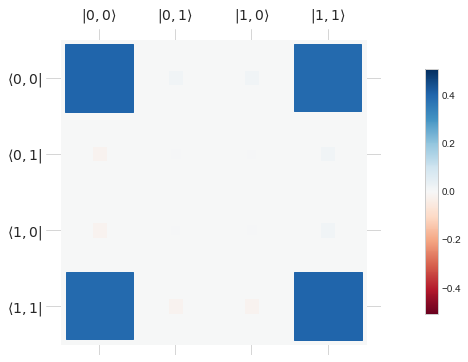

In [121]:
hinton(L_full_maker(xi_opt, dt))

### Try

In [122]:
total_time = 10*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [123]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([ 58.32944997+0.j, 448.94112388+0.j,  35.11437584+0.j,
        64.52719094+0.j, 343.40852794+0.j, 579.15739999+0.j,
       921.48983188+0.j,  23.27056079+0.j, 753.87663466+0.j,
       725.93120461+0.j, 552.84667713+0.j, 906.43907135+0.j,
       711.92949432+0.j, 249.81495527+0.j, 102.19923331+0.j,
       729.76617672+0.j,  24.78152079+0.j, 976.02018857+0.j,
       317.63684031+0.j, 947.44569283+0.j])

In [124]:
F(xi_opt, dt)

-2.9999907308235394

In [125]:
max_iter

10

In [126]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [127]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 5.00881462e-01+0.00000000e+00j  2.95121237e-04+1.17768832e-05j
   2.95121237e-04-1.17768832e-05j  4.99118538e-01+0.00000000e+00j]
 [-2.99279153e-04+2.27001945e-06j  8.88961570e-04-1.00951347e-05j
   8.85520275e-04-3.26958317e-06j  2.99279153e-04-2.27001945e-06j]
 [-2.99279153e-04-2.27001945e-06j  8.85520275e-04+3.26958317e-06j
   8.88961570e-04+1.00951347e-05j  2.99279153e-04+2.27001945e-06j]
 [ 4.99118538e-01+0.00000000e+00j -2.95121237e-04-1.17768832e-05j
  -2.95121237e-04+1.17768832e-05j  5.00881462e-01+0.00000000e+00j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a158b3198>)

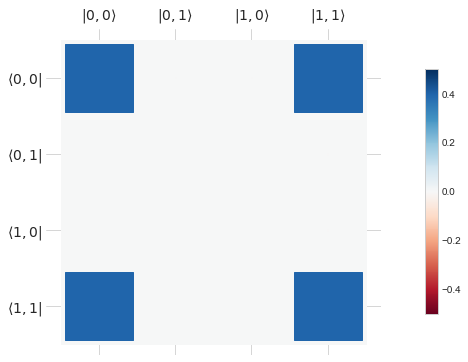

In [128]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [129]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 200
dt = total_time/time_steps

In [130]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([980.94475757+0.j, 133.61572697+0.j, 371.90224394+0.j,
       614.31187434+0.j, 241.80331467+0.j, 607.21626367+0.j,
       977.041759  +0.j, 901.32522413+0.j, 535.13825645+0.j,
       490.84403778+0.j, 445.15516916+0.j, 641.70171677+0.j,
       366.3343558 +0.j, 523.23741682+0.j, 334.62329564+0.j,
       771.41176489+0.j, 245.451452  +0.j, 111.19969851+0.j,
       562.54269048+0.j, 122.05916417+0.j,   4.02522181+0.j,
       501.10152366+0.j, 505.92091793+0.j, 746.82084043+0.j,
       636.94806444+0.j, 398.58422529+0.j, 988.06565366+0.j,
        73.0969589 +0.j, 638.2460041 +0.j, 170.24560727+0.j,
       675.9992615 +0.j, 766.82359709+0.j, 140.48736473+0.j,
       275.6440189 +0.j, 966.30810435+0.j, 759.07982532+0.j,
       288.4399965 +0.j, 752.77506092+0.j, 373.27411056+0.j,
       758.43485363+0.j, 165.57669706+0.j, 914.90950583+0.j,
        46.53406116+0.j, 609.71834026+0.j, 523.34380429+0.j,
       858.53771541+0.j, 931.56511642+0.j, 642.7475122 +0.j,
       616.01838877+0.j,

In [131]:
F(xi_opt, dt)

-3.0865920530774567

In [132]:
max_iter

10

In [133]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [134]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.42578184+0.j         -0.01789014-0.00419964j -0.01789014+0.00419964j
   0.57421816+0.j        ]
 [ 0.01479095+0.00163987j -0.06167375+0.00522678j -0.08427317-0.01086708j
  -0.01479095-0.00163987j]
 [ 0.01479095-0.00163987j -0.08427317+0.01086708j -0.06167375-0.00522678j
  -0.01479095+0.00163987j]
 [ 0.57421816+0.j          0.01789014+0.00419964j  0.01789014-0.00419964j
   0.42578184+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a15916a58>)

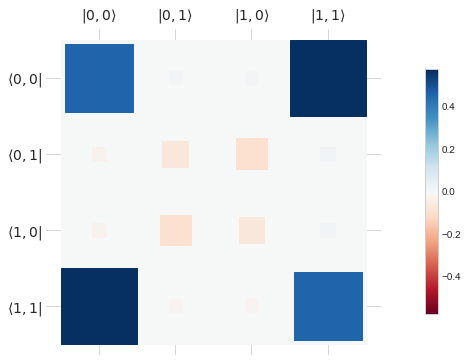

In [135]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [136]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 50
dt = total_time/time_steps

In [137]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([767.82938097+0.j, 892.48892075+0.j, 825.45795553+0.j,
       886.41869344+0.j, 350.76296917+0.j, 917.77453668+0.j,
       472.44511885+0.j, 937.66171659+0.j,  97.78505732+0.j,
       360.7291805 +0.j, 108.12579703+0.j,  51.97965142+0.j,
       535.05068539+0.j, 993.8806585 +0.j, 293.76284553+0.j,
       430.79304946+0.j, 181.55902765+0.j, 436.91684256+0.j,
       965.91117408+0.j, 810.94073972+0.j, 213.64716531+0.j,
       200.4957599 +0.j, 676.32433821+0.j, 500.92663155+0.j,
       169.67351294+0.j, 945.81315865+0.j, 354.7270273 +0.j,
       141.47344967+0.j, 472.36620451+0.j, 966.19487712+0.j,
       681.18978879+0.j, 412.68598909+0.j, 766.48370105+0.j,
        44.17907905+0.j, 708.32444114+0.j, 471.63083365+0.j,
       649.32906573+0.j, 210.56166611+0.j, 895.94918867+0.j,
       855.24173271+0.j, 701.57236128+0.j, 986.91414528+0.j,
       804.73958151+0.j, 216.65737648+0.j, 871.11898578+0.j,
       808.56059992+0.j, 320.00729995+0.j, 476.17754725+0.j,
       882.43137224+0.j,

In [138]:
F(xi_opt, dt)

-3.0921110546881883

In [139]:
max_iter

10

In [140]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [141]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.54302866+0.00000000e+00j  0.06249529-9.32095311e-05j
   0.06249529+9.32095311e-05j  0.45697134+0.00000000e+00j]
 [-0.06246147+2.97460109e-05j  0.05470521-1.85517825e-03j
   0.03165865+5.71892338e-05j  0.06246147-2.97460109e-05j]
 [-0.06246147-2.97460109e-05j  0.03165865-5.71892338e-05j
   0.05470521+1.85517825e-03j  0.06246147+2.97460109e-05j]
 [ 0.45697134+0.00000000e+00j -0.06249529+9.32095311e-05j
  -0.06249529-9.32095311e-05j  0.54302866+0.00000000e+00j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a160f8e80>)

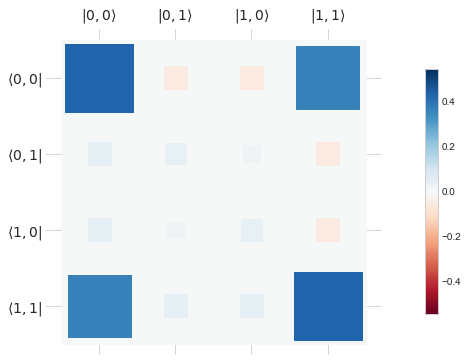

In [142]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [143]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 20#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [144]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([785.34008909+0.j, 756.28395892+0.j, 848.21984514+0.j,
       220.56954603+0.j, 830.10145303+0.j, 722.52895479+0.j,
       911.28946521+0.j, 975.84775792+0.j, 445.55808428+0.j,
       746.27467447+0.j, 206.67848248+0.j, 336.42550734+0.j,
       574.76338342+0.j, 516.92517585+0.j, 174.36028191+0.j,
       410.97510683+0.j, 918.1090729 +0.j, 815.03521269+0.j,
       976.07986654+0.j,  95.89174992+0.j])

In [145]:
F(xi_opt, dt)

-3.093130081566093

In [146]:
max_iter

20

In [147]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [148]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.5327341 +0.00000000e+00j -0.06850908-5.57398313e-05j
  -0.06850908+5.57398313e-05j  0.4672659 +0.00000000e+00j]
 [ 0.06853066-2.54581402e-04j  0.04416608+3.32379469e-04j
   0.02111134+8.92258369e-05j -0.06853066+2.54581402e-04j]
 [ 0.06853066+2.54581402e-04j  0.02111134-8.92258369e-05j
   0.04416608-3.32379469e-04j -0.06853066-2.54581402e-04j]
 [ 0.4672659 +0.00000000e+00j  0.06850908+5.57398313e-05j
   0.06850908-5.57398313e-05j  0.5327341 +0.00000000e+00j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a161907b8>)

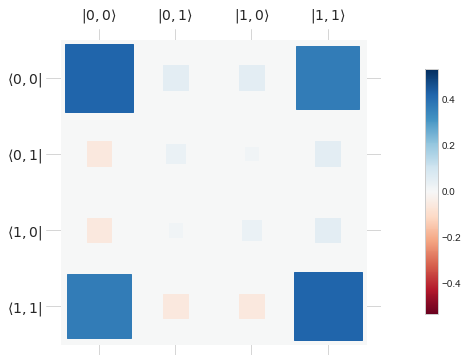

In [149]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [150]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 100#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [151]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([433.67074492+0.j, 503.37905563+0.j,  86.04339294+0.j,
       253.53141405+0.j, 337.95382581+0.j, 778.17979497+0.j,
       920.73855179+0.j, 168.14159598+0.j, 338.61940058+0.j,
       856.8550757 +0.j, 733.68020414+0.j,  24.56328003+0.j,
       434.96135706+0.j, 150.55160942+0.j,  48.6934671 +0.j,
       629.42201294+0.j, 193.21559117+0.j, 613.33655391+0.j,
       951.16199222+0.j, 849.97149488+0.j])

In [152]:
F(xi_opt, dt)

-3.092778673151856

In [153]:
max_iter

100

In [154]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [155]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.57584364+0.j         -0.00247889+0.00058362j -0.00247889-0.00058362j
   0.42415636+0.j        ]
 [ 0.00276398+0.00036607j  0.08731052-0.00320343j  0.0642995 -0.00044421j
  -0.00276398-0.00036607j]
 [ 0.00276398-0.00036607j  0.0642995 +0.00044421j  0.08731052+0.00320343j
  -0.00276398+0.00036607j]
 [ 0.42415636+0.j          0.00247889-0.00058362j  0.00247889+0.00058362j
   0.57584364+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a16415d30>)

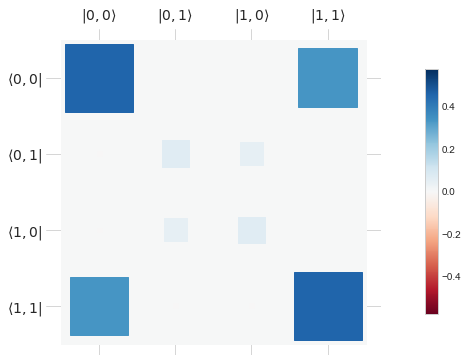

In [156]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [157]:
total_time = 3*pi/omega_1
epsilon = 10**(-6)
max_iter = 100#10**4#1000#100#50#20
time_steps = 200
dt = total_time/time_steps

In [158]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([6.44168754e+02+0.j, 1.23427170e+02+0.j, 6.77326750e+02+0.j,
       2.39616115e+02+0.j, 2.61546879e+02+0.j, 3.53376160e+02+0.j,
       1.29998384e+02+0.j, 3.39935343e+02+0.j, 2.87619352e+02+0.j,
       7.11551870e+01+0.j, 6.04966635e+02+0.j, 2.30191211e+02+0.j,
       3.55102579e+02+0.j, 1.43068840e+02+0.j, 5.89203676e+02+0.j,
       9.32287989e+02+0.j, 1.59987733e+02+0.j, 4.31516608e+02+0.j,
       9.37583430e-01+0.j, 1.32566796e+02+0.j, 6.05608223e+02+0.j,
       7.94489615e+02+0.j, 3.22771591e+02+0.j, 1.57219055e+02+0.j,
       3.52595643e+02+0.j, 5.87482312e+02+0.j, 4.25275684e+01+0.j,
       6.85479269e+02+0.j, 4.59824136e+02+0.j, 4.44583685e+02+0.j,
       8.44286173e+02+0.j, 3.28042371e+02+0.j, 2.68612092e+02+0.j,
       6.68332847e+02+0.j, 1.86908872e+02+0.j, 4.63267736e+01+0.j,
       5.10426931e+02+0.j, 4.26558891e+02+0.j, 7.94939997e+02+0.j,
       8.36208984e+02+0.j, 8.46842806e+02+0.j, 6.13558583e+02+0.j,
       1.86567814e+02+0.j, 9.62780991e+02+0.j, 8.20487392e+02+

In [159]:
F(xi_opt, dt)

-3.089719398229371

In [160]:
max_iter

100

In [161]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [162]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.50843019+0.j          0.07603111+0.00280657j  0.07603111-0.00280657j
   0.49156981+0.j        ]
 [-0.07444569+0.000588j    0.0206173 -0.00277472j -0.0023577 +0.00642164j
   0.07444569-0.000588j  ]
 [-0.07444569-0.000588j   -0.0023577 -0.00642164j  0.0206173 +0.00277472j
   0.07444569+0.000588j  ]
 [ 0.49156981+0.j         -0.07603111-0.00280657j -0.07603111+0.00280657j
   0.50843019+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a167b01d0>)

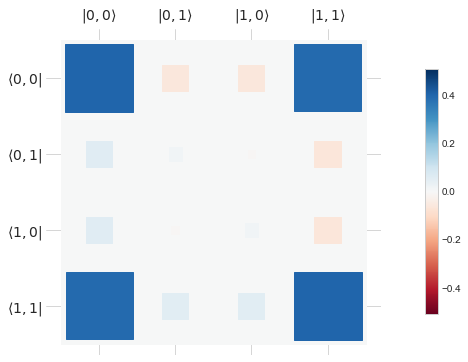

In [163]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [164]:
total_time = 3*pi/omega_1
epsilon = (0.1*2*pi)/(total_time)#10**(-6)
max_iter = 10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [165]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([ 14.61480681+0.j, 491.0347568 +0.j,  32.39374654+0.j,
       436.42749067+0.j, 201.00515166+0.j, 772.12811205+0.j,
       182.93765263+0.j, 396.95923731+0.j, 562.13433832+0.j,
       459.95853129+0.j, 160.71559886+0.j, 159.09469834+0.j,
       210.92511548+0.j, 367.36672696+0.j, 782.56655714+0.j,
       718.26885622+0.j, 454.38586571+0.j, 686.90367044+0.j,
       646.01497093+0.j, 958.19018825+0.j])

In [166]:
F(xi_opt, dt)

-3.093236247154066

In [167]:
max_iter

10

In [168]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [169]:
L_full_maker(xi_opt, dt)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.51740239+0.j         -0.07404895-0.00154848j -0.07404895+0.00154848j
   0.48259761+0.j        ]
 [ 0.07354299+0.00079761j  0.02873051+0.00580356j  0.00574766-0.00459521j
  -0.07354299-0.00079761j]
 [ 0.07354299-0.00079761j  0.00574766+0.00459521j  0.02873051-0.00580356j
  -0.07354299+0.00079761j]
 [ 0.48259761+0.j          0.07404895+0.00154848j  0.07404895-0.00154848j
   0.51740239+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a167e27b8>)

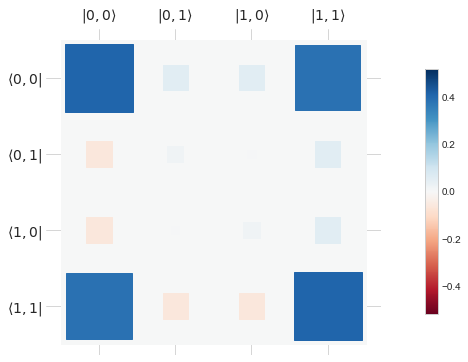

In [170]:
hinton(L_full_maker(xi_opt, dt))

### Try2

In [171]:
total_time = 3*pi/omega_1
epsilon = (0.1*2*pi)/(total_time)#10**(-6)
max_iter = 500#10#10**4#1000#100#50#20
time_steps = 20
dt = total_time/time_steps

In [172]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
xi_opt

array([ 55.07381538+0.j, 631.3339407 +0.j,  76.85871551+0.j,
       734.40877232+0.j, 992.78168383+0.j, 207.73659291+0.j,
       208.32623539+0.j, 583.2822133 +0.j, 906.28086812+0.j,
       426.2286622 +0.j, 164.71546051+0.j,  55.81767474+0.j,
       409.17191084+0.j, 768.57628751+0.j, 203.23633168+0.j,
       334.67828394+0.j, 568.91757951+0.j, 304.46892778+0.j,
       520.54234345+0.j,  30.93864072+0.j])

In [173]:
F(xi_opt, dt)

-3.0923554942357256

In [174]:
max_iter

500

In [175]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [176]:
myU = L_full_maker(xi_opt, dt)

In [177]:
myU/myU[0, 3]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.35518564+0.j         -0.01885902+0.00249709j -0.01885902-0.00249709j
   1.        +0.j        ]
 [ 0.01949435-0.00254327j  0.20506553+0.00195378j  0.15067185+0.00162994j
  -0.01949435+0.00254327j]
 [ 0.01949435+0.00254327j  0.15067185-0.00162994j  0.20506553-0.00195378j
  -0.01949435-0.00254327j]
 [ 1.        +0.j          0.01885902-0.00249709j  0.01885902+0.00249709j
   1.35518564+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1690a6a0>)

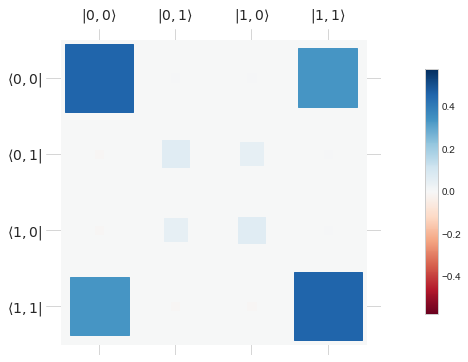

In [178]:
hinton(myU)

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a16ac2828>)

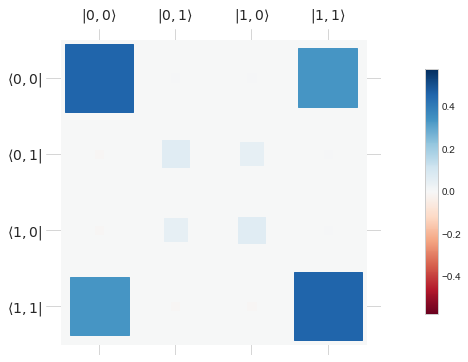

In [179]:
hinton(L_full_maker(xi_opt, dt))

### Try

In [180]:
total_time = 3*pi/omega_1
epsilon = (0.1*2*pi)/(total_time)#10**(-6)
max_iter = 500#10#10**4#1000#100#50#20
time_steps = 500
dt = total_time/time_steps

In [181]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
#xi_opt

In [182]:
F(xi_opt, dt)

-3.0877964784208713

In [183]:
max_iter

500

In [184]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [185]:
myU = L_full_maker(xi_opt, dt)

In [186]:
myU/myU[0, 3]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.74756563+0.j          0.03771216+0.00062541j  0.03771216-0.00062541j
   1.        +0.j        ]
 [-0.0419317 -0.00904231j -0.10582663+0.00565612j -0.14427396-0.02281918j
   0.0419317 +0.00904231j]
 [-0.0419317 +0.00904231j -0.14427396+0.02281918j -0.10582663-0.00565612j
   0.0419317 -0.00904231j]
 [ 1.        +0.j         -0.03771216-0.00062541j -0.03771216+0.00062541j
   0.74756563+0.j        ]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a16c39240>)

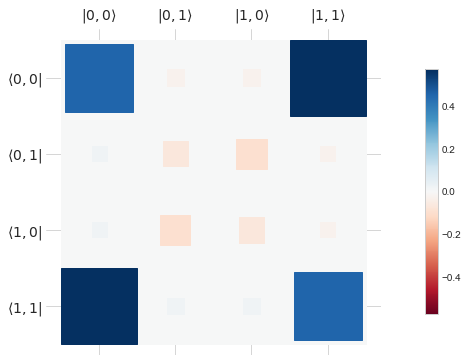

In [187]:
hinton(myU)

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a16b10898>)

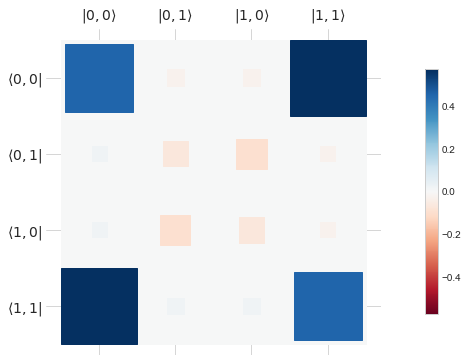

In [188]:
hinton(L_full_maker(xi_opt, dt))

### Try

In [237]:
total_time = 10*pi/omega_1
epsilon = (0.1*2*pi)/(total_time)#10**(-6)
max_iter = 500#10#10**4#1000#100#50#20
time_steps = 500
dt = total_time/time_steps

In [238]:
xi_opt = terminator(max_iter, time_steps, total_time, epsilon)
#xi_opt

In [239]:
F(xi_opt, dt)

-2.999938972581541

In [240]:
max_iter

500

In [241]:
T

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [242]:
myU = L_full_maker(xi_opt, dt)

In [243]:
myU/myU[0, 3]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.00326903e+00+0.00000000e+00j  7.74539561e-04-2.67234992e-04j
   7.74539561e-04+2.67234992e-04j  1.00000000e+00+0.00000000e+00j]
 [-8.43001003e-04-4.08679734e-05j  1.66289687e-03-1.26951449e-07j
   1.66848919e-03-2.97087713e-05j  8.43001003e-04+4.08679734e-05j]
 [-8.43001003e-04+4.08679734e-05j  1.66848919e-03+2.97087713e-05j
   1.66289687e-03+1.26951449e-07j  8.43001003e-04-4.08679734e-05j]
 [ 1.00000000e+00+0.00000000e+00j -7.74539561e-04+2.67234992e-04j
  -7.74539561e-04-2.67234992e-04j  1.00326903e+00+0.00000000e+00j]]

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a16af9080>)

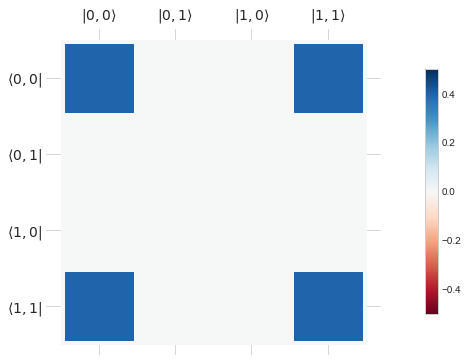

In [244]:
hinton(myU)

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a16f690f0>)

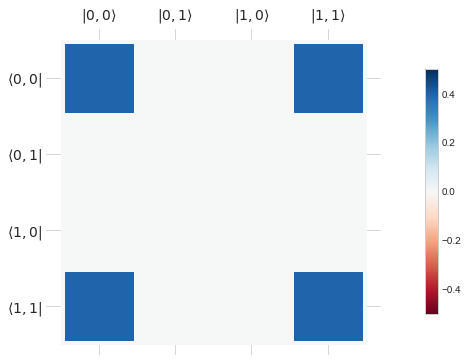

In [245]:
hinton(L_full_maker(xi_opt, dt))